In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.ticker import FormatStrFormatter
import matplotlib.transforms as mtransforms
import numpy as np
from scipy.stats import pearsonr 


In [2]:
true_lst = np.array([306.045,305.62,304.369,306.827,305.146,303.882,307.201,305.151,303.025])

In [35]:
ds = pd.read_csv(r"Datasets\simulation\simulation_dataset.csv")
ds_apriori = pd.read_csv(r"Datasets\aprior_parameters.csv")

In [5]:
bias = []
for point in ds.OE_retrieved_LST:
    bias.append(np.median(true_lst - point))

In [6]:
Hgh_filt = np.where(ds.Material_Type.values == "Hgh_emiss")
med_filt = np.where(ds.Material_Type.values == "Med_emiss")
low_filt = np.where(ds.Material_Type.values == "Low_emiss")
soil_filt = np.where(ds.Material_Type.values == "Soil")
urban_filt = np.where(ds.Material_Type.values == "Urban")

filters = [Hgh_filt, med_filt, low_filt, soil_filt, urban_filt]
colors = ["DarkGreen", "Green", "LightGreen", "DarkBlue", "DarkRed"]
pannels = ["a)", "b)", "c)", "d)", "e)"]
channels = ["C10", "C11", "C12", "C13", "C14"]
bands = [10, 11, 12, 13, 14]
lower_emiss = [0.65, 0.65, 0.65, 0.65, 0.65]


In [8]:
lse_bias = []
lse_rmse = []
lse_r = []

for band in bands:
    true =ds[f"C{band}_library_LSE"].values
    ret = ds[f"C{band}_OE_retrieved_LSE"].values

    bias = np.median(ret - true)
    rmse = np.sqrt(np.mean((ret - true)**2))
    corr_coef = pearsonr(ret,true)
    lse_bias.append(bias)
    lse_rmse.append(rmse)
    lse_r.append(corr_coef.statistic)



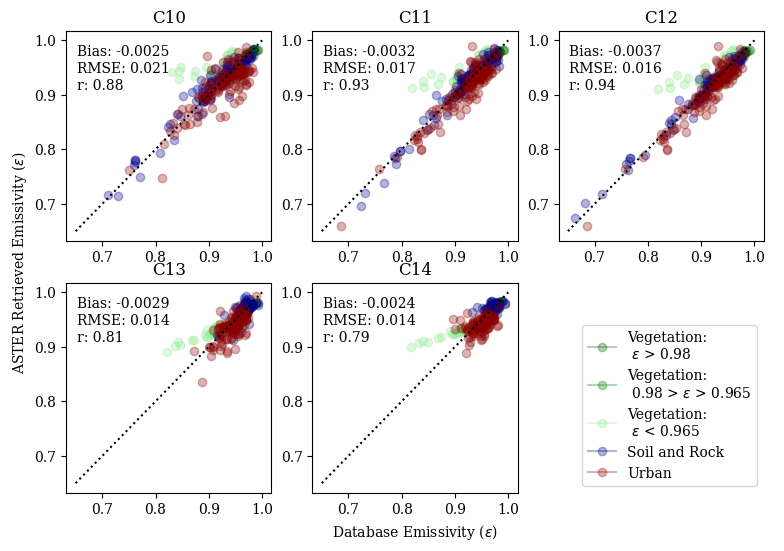

In [9]:
#text_kwargs = dict(ha='center', va='center', fontsize=28, color='C1')
plt.rcParams["font.family"] = "Serif"
fig, axs = plt.subplot_mosaic(
    figsize=(9, 6), mosaic=[["a)", "b)", "c)"], ["d)", "e)", "f)"]]
)  # ,layout='constrained')
for j, pannel in enumerate(pannels):
    for i, filt in enumerate(filters):
        c10 = axs[pannel].plot(
            ds[f"C{bands[j]}_library_LSE"].values[filt],
            ds[f"C{bands[j]}_OE_retrieved_LSE"].values[filt],
            "o",
            color=colors[i],
            alpha=0.3,
            label=filt,
        )

    axs[pannel].plot(
        [lower_emiss[j], 1], [lower_emiss[j], 1], linestyle="dotted", color="black"
    )
    axs[pannel].set_title(channels[j])
    axs[pannel].text(0.05,0.9,f"Bias: {lse_bias[j]:.2}", horizontalalignment='left', verticalalignment='center', transform=axs[pannel].transAxes)
    axs[pannel].text(0.05,0.82,f"RMSE: {lse_rmse[j]:.2}", horizontalalignment='left', verticalalignment='center', transform=axs[pannel].transAxes)
    axs[pannel].text(0.05,0.74,f"r: {lse_r[j]:.2}", horizontalalignment='left', verticalalignment='center', transform=axs[pannel].transAxes)
axs["f)"].set_axis_off()
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(
    labelcolor="none", which="both", top=False, bottom=False, left=False, right=False
)
plt.xlabel("Database Emissivity ($ε$)")
plt.ylabel("ASTER Retrieved Emissivity ($ε$)")
hgh_v = mlines.Line2D(
    [], [], color="DarkGreen", marker="o", alpha=0.3, label="Vegetation:\n $ε$ > 0.98"
)
med_v = mlines.Line2D(
    [], [], color="Green", marker="o", alpha=0.3, label="Vegetation:\n 0.98 > $ε$ > 0.965"
)
low_v = mlines.Line2D(
    [], [], color="LightGreen", marker="o", alpha=0.3, label="Vegetation:\n $ε$ < 0.965"
)
soil = mlines.Line2D([], [], color="DarkBlue", marker="o", alpha=0.3, label="Soil and Rock")
urban = mlines.Line2D([], [], color="DarkRed", marker="o", alpha=0.3, label="Urban")
plt.legend(handles=[hgh_v, med_v, low_v, soil, urban], loc="lower right")


In [36]:
truth = [
    "C10_library_LSE",
    "C11_library_LSE",
    "C12_library_LSE",
    "C13_library_LSE",
    "C14_library_LSE",
]
ret = [
    "C10_OE_retrieved_LSE",
    "C11_OE_retrieved_LSE",
    "C12_OE_retrieved_LSE",
    "C13_OE_retrieved_LSE",
    "C14_OE_retrieved_LSE",
]
ret_unc = [
    "C10_OE_retrieved_LSE_uncertainty",
    "C11_OE_retrieved_LSE_uncertainty",
    "C12_OE_retrieved_LSE_uncertainty",
    "C13_OE_retrieved_LSE_uncertainty",
    "C14_OE_retrieved_LSE_uncertainty",
]
band_strings = ["C10", "C11", "C12", "C13", "C14"]
pannels = ["a)", "b)", "c)", "d)", "e)", "f)", "g)", "h)", "i)"]
pannel_type = [
    ds_apriori.Material_Type == "Urban", 
    ds_apriori.Material_Type == "Urban", 
    ds_apriori.Material_Type == "Urban", 
    ds_apriori.Material_Type == "Soil", 
    ds_apriori.Material_Type == "Soil", 
    ds_apriori.Material_Type == "Soil", 
    ds_apriori.Material_Type == "Vegetation", 
    ds_apriori.Material_Type == "Vegetation", 
    ds_apriori.Material_Type == "Vegetation",
    ]
prior_type = [
    ds_apriori.Material_Type == "Urban_cov", 
    ds_apriori.Material_Type == "Urban_cov", 
    ds_apriori.Material_Type == "Urban_cov", 
    ds_apriori.Material_Type == "Soil_cov", 
    ds_apriori.Material_Type == "Soil_cov", 
    ds_apriori.Material_Type == "Soil_cov", 
    ds_apriori.Material_Type == "Veg_cov", 
    ds_apriori.Material_Type == "Veg_cov", 
    ds_apriori.Material_Type == "Veg_cov",
    ]
examples = [
    ds.Material_Name == "Masonry m.cap-Natural",
    ds.Material_Name == "Construction  Concrete",
    ds.Material_Name == "B001",
    ds.Material_Name == "Brown to dark brown gravelly loam",
    ds.Material_Name == "Red-orange sandy soil.",
    ds.Material_Name == "Sand Sample 1 from Orchard Supply Hardware",
    ds.Material_Name == "Ceanothus spinosus 1",
    ds.Material_Name == "Leaf of Laurel (Fresh)",
    ds.Material_Name == "Acer pensylvanicum",
]


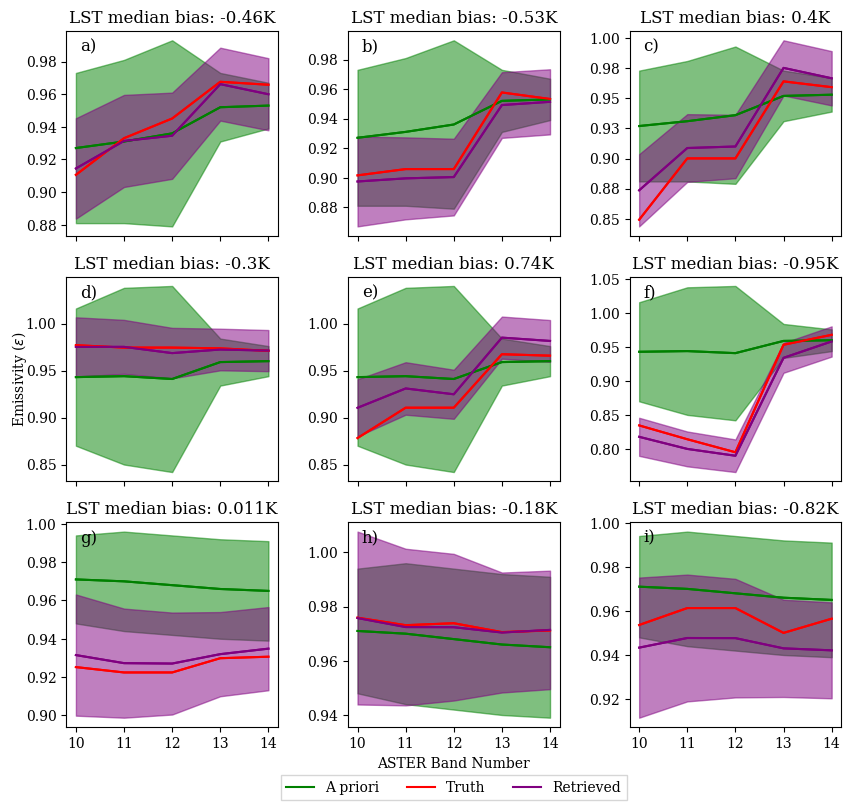

In [37]:
fig, axs = plt.subplot_mosaic(
    figsize=(10, 12),
    mosaic=[["a)", "b)", "c)"], ["d)", "e)", "f)"], ["g)", "h)", "i)"],],
    sharex=True,
)
for i, pannel in enumerate(pannels):
    axs[pannel].plot(bands,ds_apriori[pannel_type[i]][band_strings].to_numpy()[0], color="Green",label="prior")
    axs[pannel].plot(bands,ds[examples[i]][truth].to_numpy()[0], color="Red")
    axs[pannel].plot(bands,ds[examples[i]][ret].to_numpy()[0], color="Purple")
    axs[pannel].fill_between(
        bands,
        (ds_apriori[pannel_type[i]][band_strings]).to_numpy()[0] - (ds_apriori[prior_type[i]][band_strings]).to_numpy()[0],
        (ds_apriori[pannel_type[i]][band_strings]).to_numpy()[0] + (ds_apriori[prior_type[i]][band_strings]).to_numpy()[0],
        color="Green",
        alpha=0.5,
    )
    axs[pannel].fill_between(
        bands,
        (ds[examples[i]][ret]).to_numpy()[0] - (ds[examples[i]][ret_unc]).to_numpy()[0],
        (ds[examples[i]][ret]).to_numpy()[0] + (ds[examples[i]][ret_unc]).to_numpy()[0],
        color="Purple",
        alpha=0.5,
    )
    axs[pannel].plot(bands,ds_apriori[pannel_type[i]][band_strings].to_numpy()[0], color="Green",label="prior")
    axs[pannel].plot(bands,ds[examples[i]][truth].to_numpy()[0], color="Red")
    axs[pannel].plot(bands,ds[examples[i]][ret].to_numpy()[0], color="Purple")
    axs[pannel].yaxis.set_major_formatter(FormatStrFormatter("%.2f"))
    axs[pannel].set_title(f"LST median bias: {np.median(true_lst - ds[examples[i]]['OE_retrieved_LST'].values[0]):.02}K")
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
for label, ax in axs.items():
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,fontsize='large', verticalalignment='top')
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(
    labelcolor="none", which="both", top=False, bottom=False, left=False, right=False
)


plt.xlabel("ASTER Band Number")
plt.ylabel("Emissivity ($ε$)")

fig.subplots_adjust(bottom=0.3, wspace=0.33)

axs["h)"].legend(labels=['A priori', 'Truth', 'Retrieved'],loc='upper center', 
             bbox_to_anchor=(0.5, -0.2),fancybox=False, shadow=False, ncol=3)
